# World Happiness Report

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

### Importing required Libraries

In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Loading the Datasets

#### answer1

In [2]:
import pandas as pd
df=pd.read_csv('happiness_score_dataset.csv')
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df.shape

(158, 12)

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


As there is differnce between mean and std there would be ouliers and


As the diffrence between min and max is too large one need is to scale the data

In [7]:
#checking null values in dataset of 2015
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values in our dataset

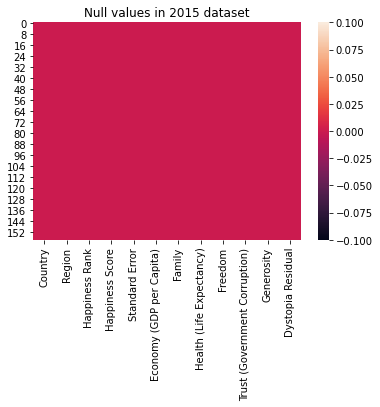

In [8]:
sns.heatmap(df.isnull())
plt.title("Null values in 2015 dataset")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df["Country"]=LE.fit_transform(df["Country"])

In [10]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df["Region"]=LE.fit_transform(df["Region"])

checking corelation for multivarients as we need to compare 6 different columns

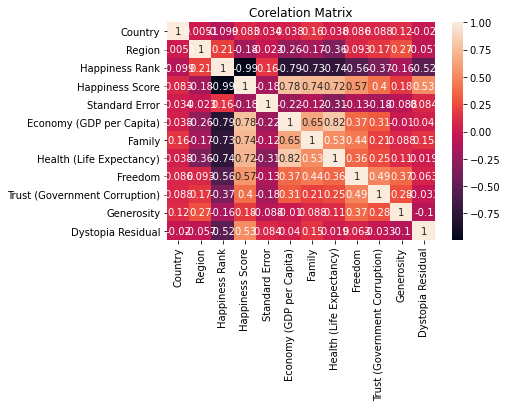

In [11]:
correlation_matrix=df.corr()
plt.figure()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Corelation Matrix")
plt.show()

In [12]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
correlation_matrix["Happiness Rank"].sort_values(ascending=False)
#here it represents relation between happiness rank is max with wich region they belong,country,generosity of people, trust and as such in decreasing order.

Happiness Rank                   1.000000
Region                           0.213773
Standard Error                   0.158516
Country                         -0.098538
Generosity                      -0.160142
Trust (Government Corruption)   -0.372315
Dystopia Residual               -0.521999
Freedom                         -0.556886
Family                          -0.733644
Health (Life Expectancy)        -0.735613
Economy (GDP per Capita)        -0.785267
Happiness Score                 -0.992105
Name: Happiness Rank, dtype: float64

In [14]:
correlation_matrix["Economy (GDP per Capita)"].sort_values(ascending=False)
##here it Economy is highly dependent(corelated with)  on Life Expectancy, hapiness score and so on

Economy (GDP per Capita)         1.000000
Health (Life Expectancy)         0.816478
Happiness Score                  0.780966
Family                           0.645299
Freedom                          0.370300
Trust (Government Corruption)    0.307885
Dystopia Residual                0.040059
Country                          0.037808
Generosity                      -0.010465
Standard Error                  -0.217651
Region                          -0.260139
Happiness Rank                  -0.785267
Name: Economy (GDP per Capita), dtype: float64

In [15]:
correlation_matrix["Country"].sort_values(ascending=False)

Country                          1.000000
Family                           0.159416
Generosity                       0.118085
Trust (Government Corruption)    0.088155
Freedom                          0.085684
Happiness Score                  0.083380
Health (Life Expectancy)         0.037829
Economy (GDP per Capita)         0.037808
Standard Error                   0.033879
Region                           0.005092
Dystopia Residual               -0.019778
Happiness Rank                  -0.098538
Name: Country, dtype: float64

##### Below Happiness score is dependent on or highly corelated with economy,family,health,freedom,and so on

In [16]:
correlation_matrix["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [17]:
#sns.pairplot(df)
#plt.show()

In [18]:
#Finding skew
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [19]:
#removing skew
from sklearn.preprocessing import power_transform
df_new = power_transform(df[2:])
df= pd.DataFrame(df_new,columns=df.columns)

In [20]:
#after removing skewness
df.skew()

Country                         -0.280117
Region                          -0.219884
Happiness Rank                  -0.243503
Happiness Score                 -0.029018
Standard Error                  -0.019301
Economy (GDP per Capita)        -0.122119
Family                          -0.177443
Health (Life Expectancy)        -0.180219
Freedom                         -0.078451
Trust (Government Corruption)    0.184800
Generosity                       0.012161
Dystopia Residual                0.025920
dtype: float64

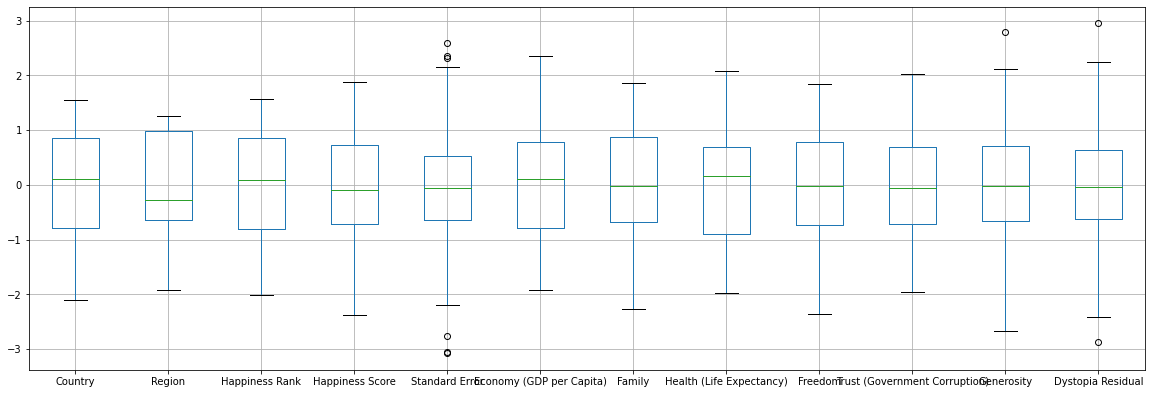

In [21]:
#checking for outliers
df.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [23]:
#zscore to remove outliers
import scipy.stats as stats
import numpy as np
val = np.abs(stats.zscore(df))
df = df[(val<12).all(axis=1)]

In [24]:
#after removing outliers lets check skewness
df.skew()

Country                         -0.280117
Region                          -0.219884
Happiness Rank                  -0.243503
Happiness Score                 -0.029018
Standard Error                  -0.019301
Economy (GDP per Capita)        -0.122119
Family                          -0.177443
Health (Life Expectancy)        -0.180219
Freedom                         -0.078451
Trust (Government Corruption)    0.184800
Generosity                       0.012161
Dystopia Residual                0.025920
dtype: float64

In [26]:
#from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
#df_train, df_test = train_test_split('happiness_score_dataset.csv', train_size = 0.7, test_size = 0.3, random_state = 100)''


In [27]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables

#df_train = scaler.fit_transform(df)

#df_train''

# Report

### What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? 

##### top 10 countries

In [28]:
df.head(10)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.837346,1.260412,-2.018929,1.871648,-1.062616,1.259882,1.802134,1.113545,1.653066,1.920296,0.944253,0.714864
1,0.625655,1.260412,-1.972196,1.867613,-0.506874,1.648405,1.610205,1.176322,1.831912,1.640346,0.980201,0.663882
2,-1.188094,0.052021,-1.927969,1.790788,-0.825340,1.262206,1.557339,1.299676,1.511414,1.520635,1.603760,0.638092
3,-0.639129,1.260412,-1.885725,1.773767,-1.273085,1.159212,1.529965,1.199670,1.586401,1.774400,0.144337,0.959951
4,0.510981,1.260412,-1.845107,1.751051,-1.685434,1.271246,1.296039,1.222093,1.365303,1.477313,1.690673,0.664625
5,1.155806,1.260412,-1.805858,1.739684,-1.253578,1.277765,1.349777,1.331773,1.744200,1.831484,1.078011,0.485479
6,0.530228,-1.914723,-1.767787,1.676237,-1.016068,1.045662,1.538823,1.316437,1.566474,1.810960,1.685505,0.284903
7,-1.790340,-1.914723,-1.730746,1.674608,-0.323755,1.283138,1.473574,1.460296,1.669266,1.613015,1.490084,0.289025
8,-0.204219,-0.282174,-1.694617,1.669719,-0.911075,0.984846,0.969150,1.350232,-0.171914,-0.453859,0.881016,1.887310
9,-0.940927,-0.635648,-1.659303,1.627299,-0.015491,0.243264,1.048215,1.029363,1.518181,-0.070121,0.321440,2.067192


In [29]:
correlation_matrix["Happiness Rank"].sort_values(ascending=False)


Happiness Rank                   1.000000
Region                           0.213773
Standard Error                   0.158516
Country                         -0.098538
Generosity                      -0.160142
Trust (Government Corruption)   -0.372315
Dystopia Residual               -0.521999
Freedom                         -0.556886
Family                          -0.733644
Health (Life Expectancy)        -0.735613
Economy (GDP per Capita)        -0.785267
Happiness Score                 -0.992105
Name: Happiness Rank, dtype: float64

##### from the above fig we can see that, except Trust regarding Government Corruption every other thing like social, support, health life expectancy and so on makes people happy.


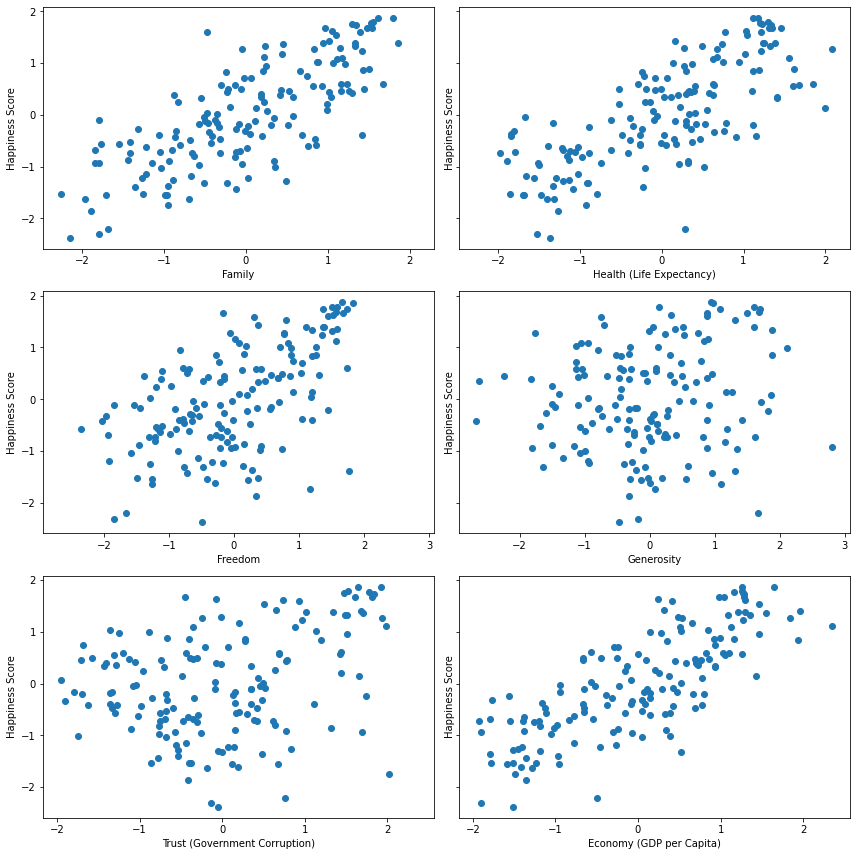

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12),
                         sharey='row', sharex='row') #we created a grid of 6 plots

axes[0, 0].scatter(x=df['Family'],y=df['Happiness Score']) # plot at 1st row, 1st col and 1st position
axes[0, 0].set_xlabel('Family')
axes[0, 0].set_ylabel('Happiness Score')

axes[0, 1].scatter(x=df['Health (Life Expectancy)'],y=df['Happiness Score'])# plot at 1st row, 2st col and 2st position
axes[0, 1].set_xlabel('Health (Life Expectancy)')
axes[0, 1].set_ylabel('Happiness Score')

axes[1, 0].scatter(x=df['Freedom'],y=df['Happiness Score'])# plot at 2nd row, 1st col and 1st position
axes[1, 0].set_xlabel('Freedom')
axes[1, 0].set_ylabel('Happiness Score')

axes[1, 1].scatter(x=df['Generosity'],y=df['Happiness Score'])# plot at 2nd row, 2nd col and 2nd position
axes[1, 1].set_xlabel('Generosity')
axes[1, 1].set_ylabel('Happiness Score')

axes[2, 0].scatter(x=df['Trust (Government Corruption)'],y=df['Happiness Score'])# plot at 3rd row, 1st col and 1st position
axes[2, 0].set_xlabel('Trust (Government Corruption)')
axes[2, 0].set_ylabel('Happiness Score')

axes[2, 1].scatter(x=df['Economy (GDP per Capita)'],y=df['Happiness Score'])# plot at 3rd row, 2nd col and 2nd position
axes[2, 1].set_xlabel('Economy (GDP per Capita)')
axes[2, 1].set_ylabel('Happiness Score')


fig.tight_layout()


### How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

##### based on 6 differnt factors, happiness rank changes in accordance with happiness score

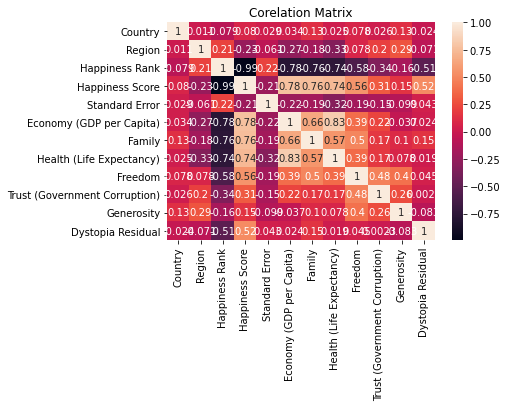

In [31]:
correlation_matrix=df.corr()
plt.figure()
sns.heatmap(correlation_matrix,annot=True)
plt.title("Corelation Matrix")
plt.show()